In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
games_all_data_df = pd.read_csv("./data/all_teams.csv")

In [42]:
#just wants stats from full games
games_df = games_all_data_df[(games_all_data_df["situation"] == "all") & (games_all_data_df["playoffGame"] == 0)].copy()
games_df["game_date"] = pd.to_datetime(games_df["gameDate"], format="%Y%m%d")
games_df["year"] = games_df["game_date"].dt.year
games_df["month"] = games_df["game_date"].dt.month
games_df["day"] = games_df["game_date"].dt.day

In [43]:
start_date = games_df['game_date'].min()
end_date = games_df['game_date'].max()
print(f"Data start: {start_date}")
print(f"Data end: {end_date}")

Data start: 2008-10-04 00:00:00
Data end: 2025-11-16 00:00:00


In [44]:
def applySeason(data_row):
    #season runs Sept-June
    year = data_row['year']
    if(data_row['month'] < 8):
        return f"{year-1}-{year}"
    else:
        return f"{year}-{year+1}"
    
games_df['season'] = games_df.apply(applySeason, axis=1)

In [ ]:
#clean duplicates


In [45]:
games_df['totalGoals'] = games_df["goalsFor"] + games_df["goalsAgainst"]

In [46]:
goals_per_game_by_season = games_df.groupby("season")["totalGoals"].mean()
print(goals_per_game_by_season)

season
2008-2009    5.695192
2009-2010    5.532140
2010-2011    5.464228
2011-2012    5.321138
2012-2013    5.308333
2013-2014    5.343089
2014-2015    5.324390
2015-2016    5.337398
2016-2017    5.450407
2017-2018    5.860740
2018-2019    5.961448
2019-2020    5.947320
2020-2021    5.796083
2021-2022    6.211890
2022-2023    6.286585
2023-2024    6.163110
2024-2025    6.022104
2025-2026    6.106667
Name: totalGoals, dtype: float64


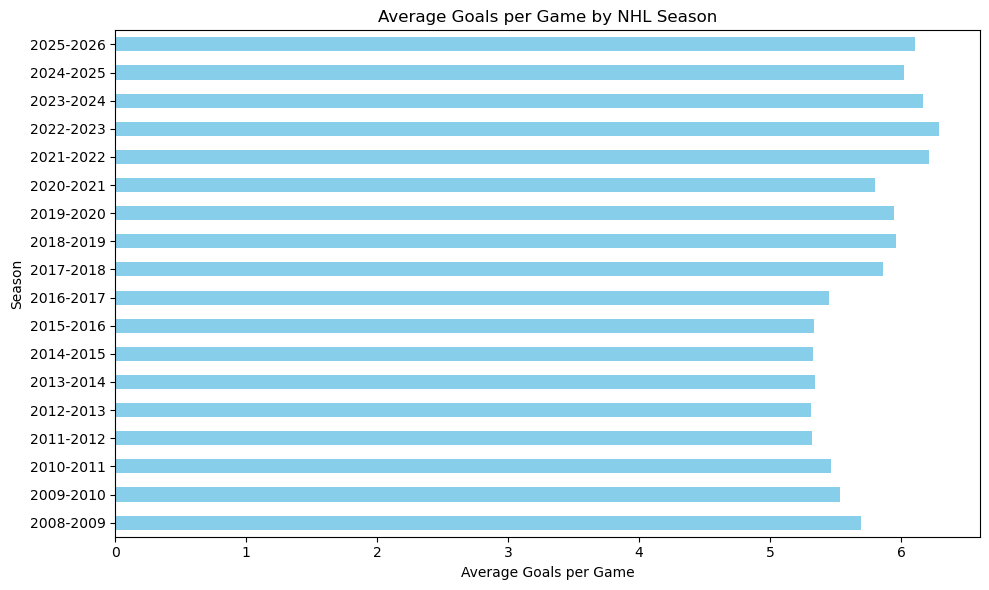

In [47]:
plt.figure(figsize=(10, 6))
goals_per_game_by_season.plot(kind='barh', color='skyblue')
plt.xlabel('Average Goals per Game')
plt.ylabel('Season')
plt.title('Average Goals per Game by NHL Season')
plt.tight_layout()
plt.show()

In [48]:
goals_per_game_by_month = games_df.groupby("month")["totalGoals"].mean()
print(goals_per_game_by_month)

month
1     5.709172
2     5.697564
3     5.706057
4     5.791904
5     5.989796
10    5.834422
11    5.664303
12    5.735067
Name: totalGoals, dtype: float64


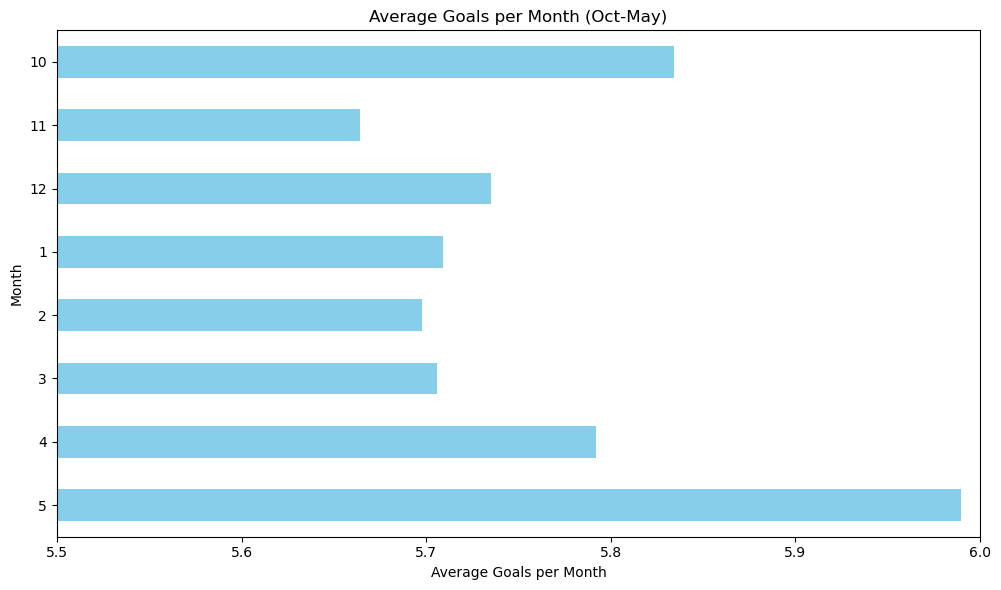

In [ ]:
month_order = [10, 11, 12, 1, 2, 3, 4, 5]
ordered_goals_per_game_by_month = goals_per_game_by_month.loc[month_order]

plt.figure(figsize=(10, 6))
ordered_goals_per_game_by_month.plot(kind='barh', color='skyblue')
plt.xlabel('Average Goals per Month')
plt.ylabel('Month')
plt.title('Average Goals per Month (Oct-May)')
plt.tight_layout()
plt.gca().invert_yaxis()  # Reverse y-axis so 10 is at the top
plt.xlim(5.5, 6.0) 
plt.show()

In [56]:
avg_scoring_by_season_month = games_df.groupby(["season","month"])["totalGoals"].mean()

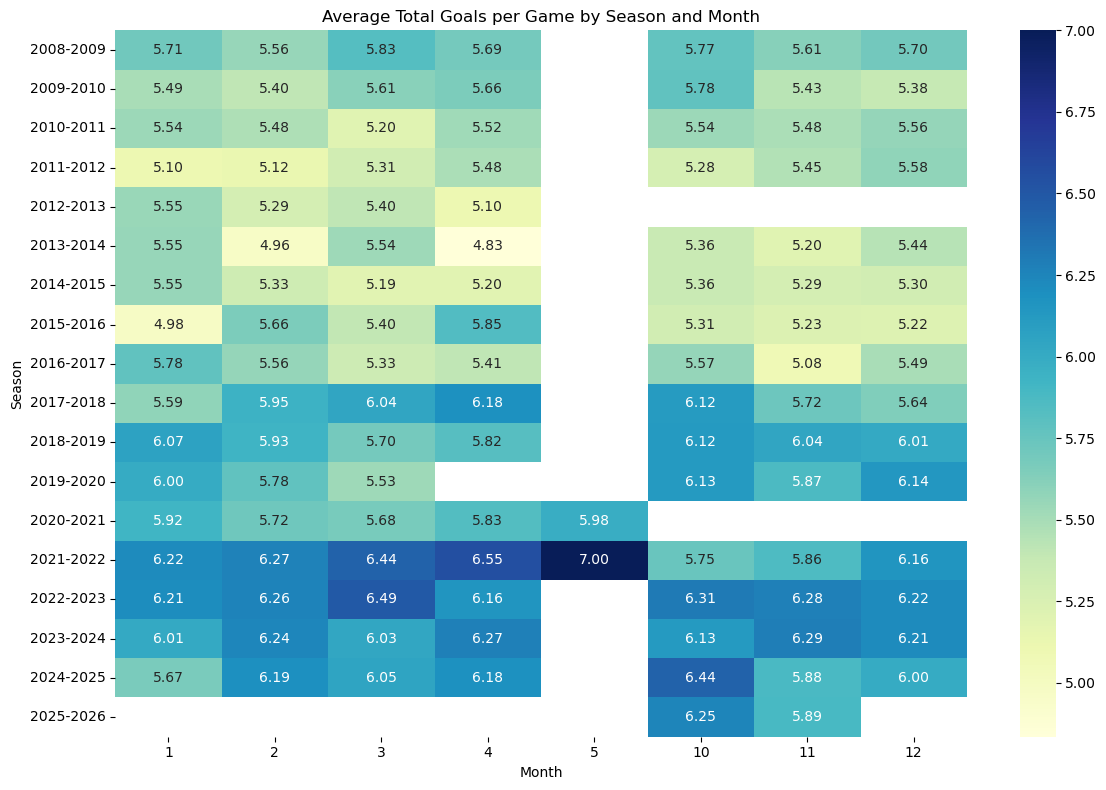

In [58]:
import seaborn as sns

# Pivot the grouped data for heatmap
heatmap_data = avg_scoring_by_season_month.unstack("month")

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Total Goals per Game by Season and Month")
plt.xlabel("Month")
plt.ylabel("Season")
plt.tight_layout()
plt.show()

In [60]:
games_in_may = games_df[(games_df["month"] == 5) & (games_df["season"]=="2021-2022")]
print(games_in_may)

       team     season name      gameId playerTeam opposingTeam home_or_away  \
28066   WPG  2021-2022  WPG  2021021179        WPG          SEA         HOME   
101906  SEA  2021-2022  SEA  2021021179        SEA          WPG         AWAY   

        gameDate    position situation  ...  reboundxGoalsAgainst  \
28066   20220501  Team Level       all  ...                 0.552   
101906  20220501  Team Level       all  ...                 0.303   

        totalShotCreditAgainst  scoreAdjustedTotalShotCreditAgainst  \
28066                    3.672                                3.812   
101906                   3.289                                3.203   

        scoreFlurryAdjustedTotalShotCreditAgainst  playoffGame  game_date  \
28066                                       3.771            0 2022-05-01   
101906                                      3.040            0 2022-05-01   

        year  month  day  totalGoals  
28066   2022      5    1         7.0  
101906  2022      5    1   